# Ejercicio transformada de Hough para detección de inclusiones fluidas

### Funciones usadas (en funcionesHough.py):

load ->  carga la imagen a color
loagGrey ->  carga la imagen en tonos de grises
graph -> grafica la imagen, por default en escala de grises, se puede cambiar, dandole un segundo argumento con el string y el nombre de la paleta de colores

canny -> devuelve imagen con bordes detectados por Canny
plotCanny ->  grafica la imagen devuelta por canny

findLines -> encuentra lineas con los parametros dados, devuelve np.array con datos de lineas encontradas
drawLines -> dibuja las lineas en una imagen que se da como segundo argumento

findCircles ->  encuentra los circulos con los parametros dados, devuelve np.array con datos circulos encontrados
drawCircles -> dibuja los círculos encontrados en una imagen que se pasa como segundo argumento

#### Se usa ipywidgets para hacer interacción con input de parámetros y ver el resultado en tiempo real

In [1]:
# importar las funciones de funcionesHough.py
from funcionesHough import *

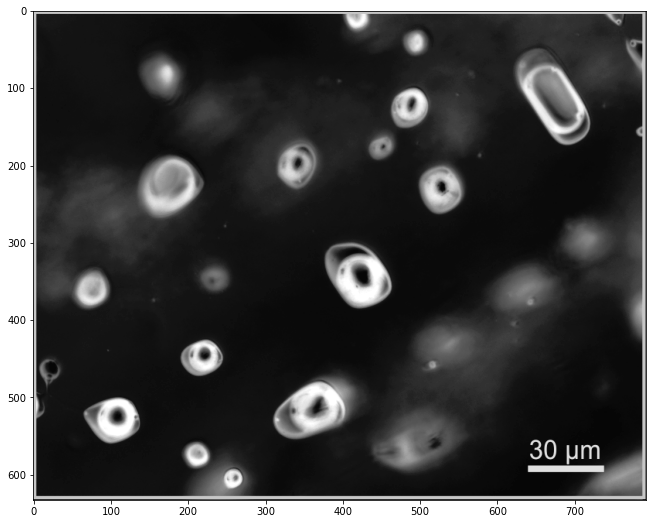

In [2]:
img = loadGrey("quartz.png")

graph(img)

## Ejemplo detección de bordes con el filtro Canny

In [3]:
import ipywidgets as wd
imagen = loadGrey("quartz.png")
@wd.interact(A=(0,100,5), B=(0, 200, 10))

def actualice(A=20, B=20):
    return plotCanny(imagen, A, A*2) # cambiar A*2 por B para libertad completa en parametrosb

interactive(children=(IntSlider(value=20, description='A', step=5), IntSlider(value=20, description='B', max=2…

### Un ejemplo más con un circón

In [4]:
import ipywidgets as wd
imagen = loadGrey("circon.jpg")
@wd.interact(A=(0,400,10), B=(0, 800, 10))

def actualice(A=100, B=100):
    return plotCanny(imagen, A, A*2) # cambiar A*2 por B para libertad completa en parametrosb

interactive(children=(IntSlider(value=100, description='A', max=400, step=10), IntSlider(value=100, descriptio…

### Haciendo detección de lineas con la transformada de Hough en la imagen de bordes y sobreimponiendola en la imagen original

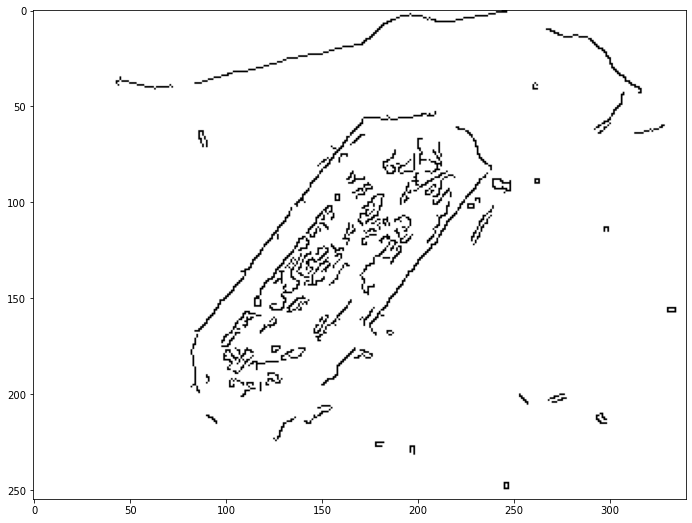

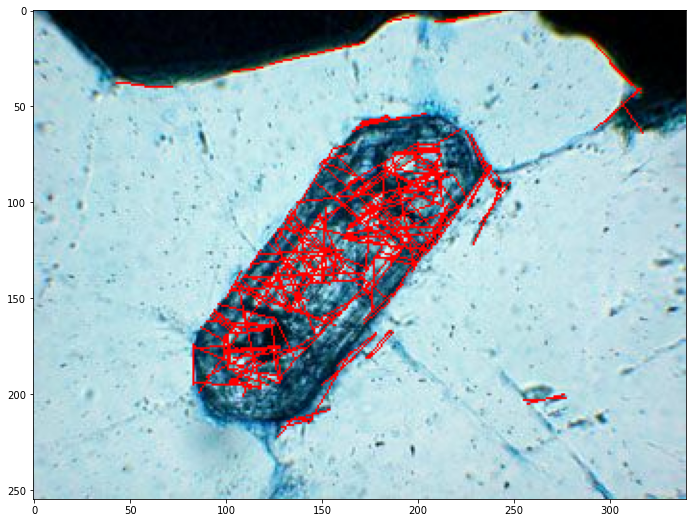

In [5]:

A = 350
circonColor = load("circon.jpg")
bordes = canny(imagen, A, A*2)
graph(bordes)
lineas = findLines(bordes, 10,3.1415/180, 8, 10, 15)
graph(drawLines(lineas, circonColor))

## A continuación sin aplicar el filtro de detección de bordes

In [8]:
import cv2
import numpy as np 
%matplotlib inline
imgCOL = load("quartz.png")
img2 = loadGrey("quartz.png")
imagen2 = cv2.bilateralFilter(img2, 11, 30, 30)

@wd.interact(n=(1,3,0.1), pm1=(5,40,5), pm2=(0,120,5), minDs =(0,100,10), minRd=(0,100,10), maxRd=(10,100,10))


# 1,50,30,100,0,100
def actualice2(n=1, pm1=50, pm2=30, minDs=100, minRd=0, maxRd=100):
    #borde = canny(imagen, 70,160)
    im = img2.copy()
    color = imgCOL.copy()
    circulos = findCircles(im,n,pm1,pm2,minDs,minRd,maxRd)
    # lineas = drawLines(findLines(bordes, rho,np.pi/180, thr, mll, mlg), imag)
    imgCirculos = drawCircles(circulos, color, escala=30)
    return graph(imgCirculos)        


interactive(children=(FloatSlider(value=1.0, description='n', max=3.0, min=1.0), IntSlider(value=40, descripti…

## Ahora adicionandole un detector de bordes

In [9]:
imgCOL = load("quartz.png") # imagen original a color
img2 = loadGrey("quartz.png") # imagen para el tratamiento en Hough
img3 = canny(img2,40,80) # adicionandole un detector de bordes
imgProc= cv2.bilateralFilter(img3, 11, 30, 30) # filtro de ruido

@wd.interact(n=(1,3,0.1), pm1=(5,40,5), pm2=(0,120,5), minDs =(0,100,10), minRd=(0,100,10), maxRd=(10,100,10))


# 1,50,30,100,0,100
def actualice2(n=1, pm1=10, pm2=25, minDs=70, minRd=0, maxRd=40):
    #borde = canny(imagen, 70,160)
    imgProcCopy = imgProc.copy()
    color = imgCOL.copy()
    circulos = findCircles(imgProcCopy,n,pm1,pm2,minDs,minRd,maxRd)
    # lineas = drawLines(findLines(bordes, rho,np.pi/180, thr, mll, mlg), imag)
    imgCirculos = drawCircles(circulos, color)
    return graph(imgCirculos)        


interactive(children=(FloatSlider(value=1.0, description='n', max=3.0, min=1.0), IntSlider(value=10, descripti…